## Changing contrast and brightness
The simplest way to modify the brightness of an image f(x) is to apply a linear transformation
g(x)=a⋅f(x)+b
The parameters a>0 and b are called the *gain* and *bias* parameters and they are used to control contrast and brightness respectively.

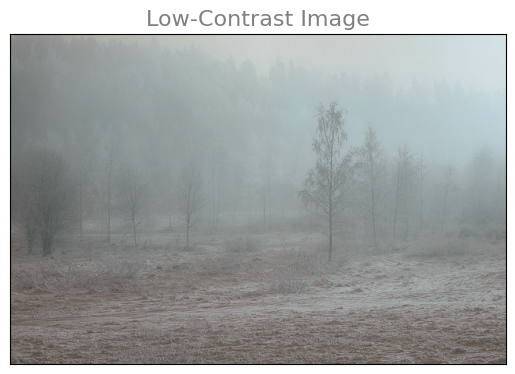

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# read image
img = cv2.imread("low_contrast_image.png", cv2.IMREAD_COLOR)

imgplot= plt.imshow(img)
plt.title('Low-Contrast Image',
          fontdict={'fontsize':16, 'color':'grey'})
plt.show(plt.xticks([]), plt.yticks([]))

In [2]:
a = 1.0 # Simple contrast control
b = 0 # Simple brightness control
c=3
"""# Initialize values
print(' Basic Linear Transformation ')
print('-------------------------')
try:
    a = float(input('* Enter the a value [1.0, 3.0]: '))
    c = int(input('* Enter the c value [-100, 100]: '))
except ValueError:
    print('Error, not a number')"""

"# Initialize values\nprint(' Basic Linear Transformation ')\nprint('-------------------------')\ntry:\n    a = float(input('* Enter the a value [1.0, 3.0]: '))\n    c = int(input('* Enter the c value [-100, 100]: '))\nexcept ValueError:\n    print('Error, not a number')"

To perform the operation g(x,y)=a⋅f(x,y)+c we will access to each pixel in image. Since we are operating with BGR images, we will have three values per pixel (B, G and R), so we will also access them separately. But this will take some time...

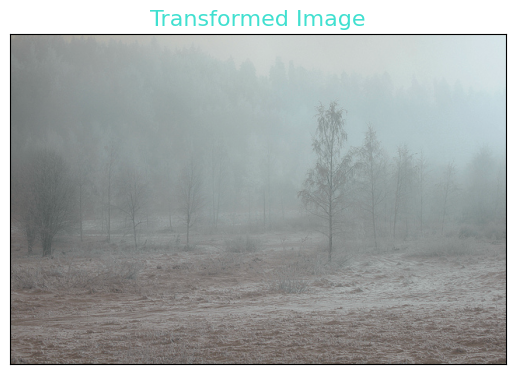

In [3]:
new_img = np.zeros(img.shape, img.dtype)
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for b in range(img.shape[2]):
            new_img[y,x,b] = np.clip(a*img[y,x,b] + c, 0, 255)
plt.imshow(new_img)
plt.title('Transformed Image',
          fontdict={'fontsize':16, 'color':'turquoise'})
plt.show(plt.xticks([]), plt.yticks([]))

Instead of using the for loops to access each pixel, we could have simply used this command which is more fast:

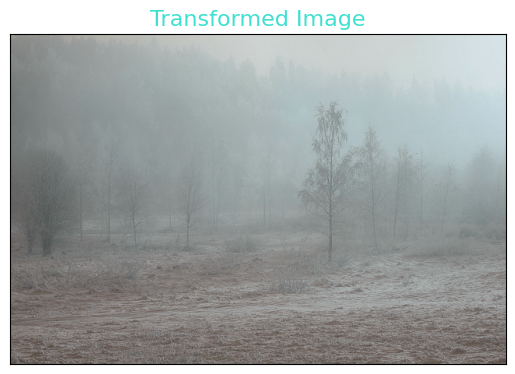

In [5]:
new_img = cv2.convertScaleAbs(img, alpha=a, beta=b)
plt.imshow(new_img)
plt.title('Transformed Image',
          fontdict={'fontsize':16, 'color':'turquoise'})
plt.show(plt.xticks([]), plt.yticks([]))


# Image negative
This is the simplest gray-level transformation.

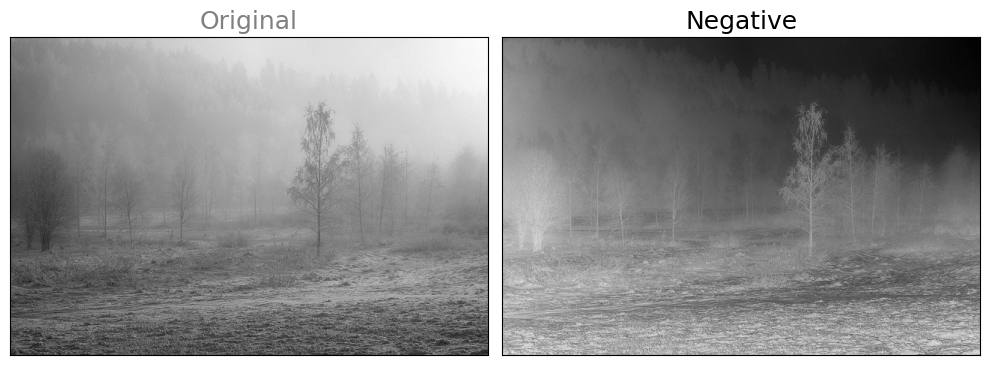

In [6]:
#convert the color image into a gray-level image
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

neg=255-src

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(src,'gray')
ax[0].set_title('Original', fontsize=18, color='gray')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(neg,'gray')
ax[1].set_title('Negative', fontsize=18)
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout();   # final semi-column can substitute plt.show()


# Histogram equalization
OpenCv offers the function `cv2.equalizeHist()` to perform histogram equalization

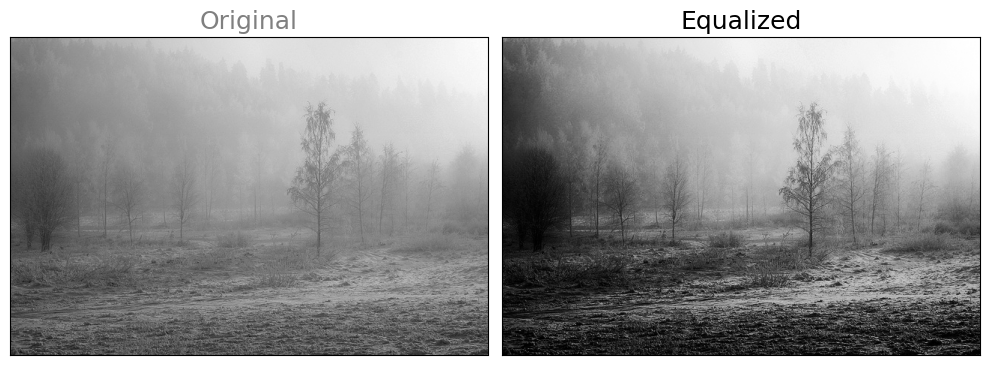

In [7]:
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = cv2.equalizeHist(src)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(src,'gray')
ax[0].set_title('Original', fontsize=18, color='gray')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(dst,'gray')
ax[1].set_title('Equalized', fontsize=18)
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout();   # final semi-column can substitute plt.show()

To see the effect of histogram equalization, we can compute and plot the histogram of both the original image and the improved image.

C:\Users\fonta\AppData\Local\Temp\ipykernel_24868\1413474940.py:7: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(src.flatten(),256,[0,256], color = 'gray')


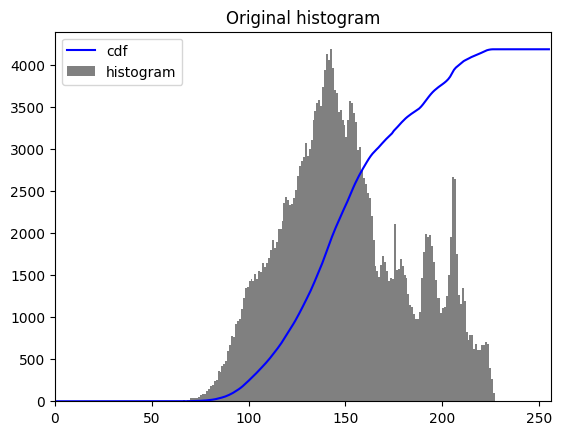

C:\Users\fonta\AppData\Local\Temp\ipykernel_24868\1413474940.py:18: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(dst.flatten(),256,[0,256], color = 'gray')


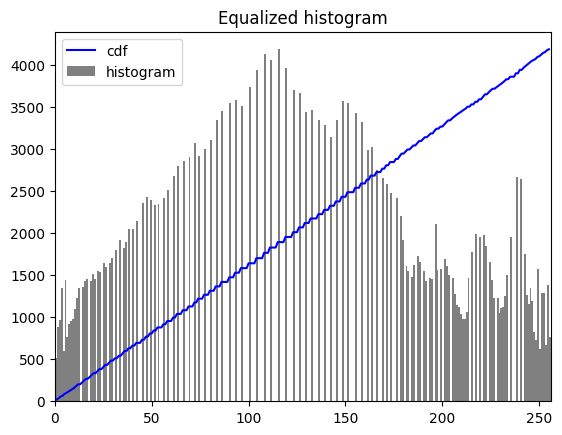

In [8]:
#Compute and plot histogram of source image
hist,bins = np.histogram(src.flatten(),256,[0,256])
cdf = hist.cumsum() #cumulative distribution function
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'blue')
plt.title('Original histogram')
plt.hist(src.flatten(),256,[0,256], color = 'gray')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#Compute and plot histogram of improved image
hist,bins = np.histogram(dst.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'blue')
plt.title('Equalized histogram')
plt.hist(dst.flatten(),256,[0,256], color = 'gray')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Adaptive Histogram Equalization (CLAHE)
CLAHE is the OpenCV implementation for making adaptive equalization, basically this algorithm makes histogram equalization for blocks of size specified in the 'tileGridSize' parameters and do some automagically tricks to avoid block artifacts.

Text(0.5, 1.0, 'Image equalized')

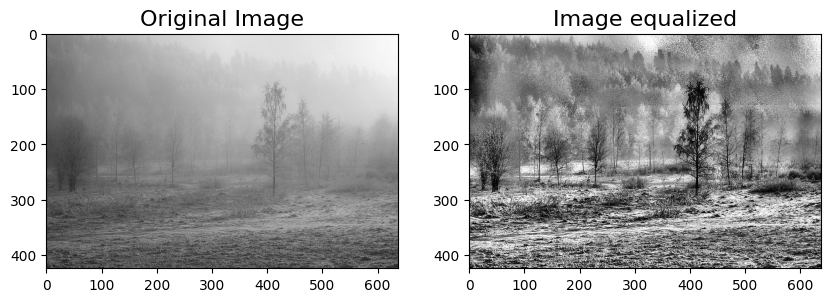

In [9]:
# create a CLAHE object
clahe = cv2.createCLAHE(tileGridSize=(8,8))
dst_clahe = clahe.apply(src)

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(src, 'gray')
ax[0].set_title('Original Image', fontsize=16)
ax[1].imshow(dst_clahe, 'gray')
ax[1].set_title('Image equalized', fontsize=16)

# Linear stretching
Another way to improve the contrast is to apply linear stretching. To perform linear stretching we take the dynamic range [a,b] of the image and transform it into the interval [0,255] using the function:
$$ T(l) = 255\dfrac{l-a}{b-a}, \qquad a\leq l\leq b $$

49 228
0 255


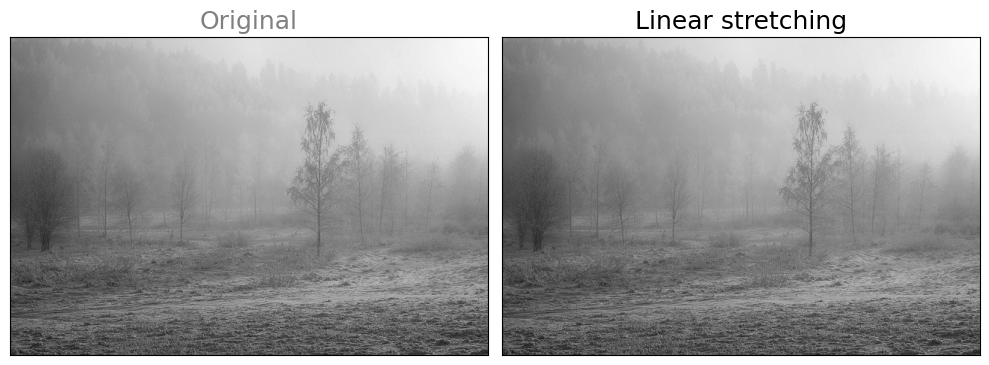

In [10]:
# src: is the grayscale image to be enhanced
# a: is the lowest gray level in src
# b: is the highest gray level in src
a=src.min()
b=src.max()
print(a,b)
src.dtype, src.min(), src.max(), src.shape
stretched=255*((src-a)/(b-a))
print(int(stretched.min()),int(stretched.max()))

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(src,'gray')
ax[0].set_title('Original', fontsize=18, color='gray')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(stretched,'gray')
ax[1].set_title('Linear stretching', fontsize=18)
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout();

C:\Users\fonta\AppData\Local\Temp\ipykernel_24868\678978482.py:7: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(src.flatten(),256,[0,256], color = 'gray')


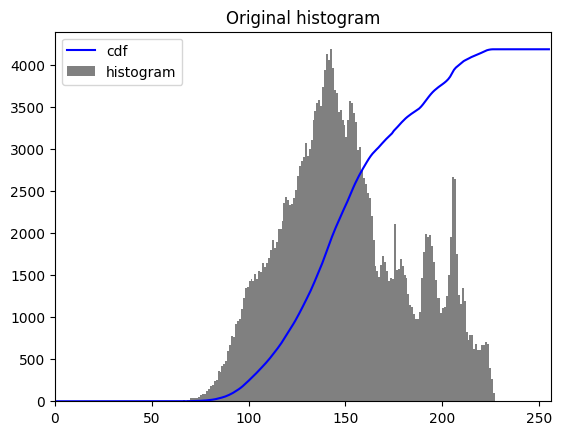

C:\Users\fonta\AppData\Local\Temp\ipykernel_24868\678978482.py:18: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(stretched.flatten(),256,[0,256], color = 'gray')


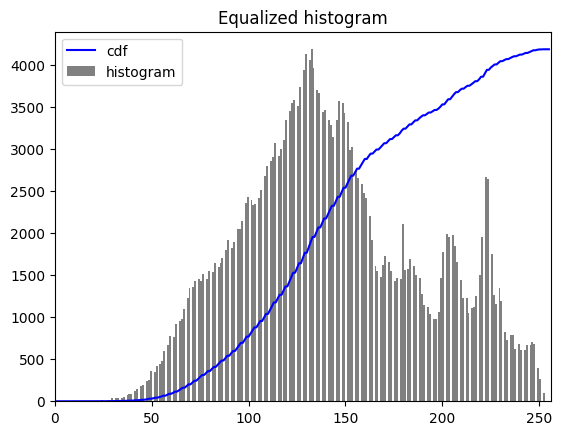

In [11]:
#Compute and plot histogram of source image
hist,bins = np.histogram(src.flatten(),256,[0,256])
cdf = hist.cumsum() #cumulative distribution function
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'blue')
plt.title('Original histogram')
plt.hist(src.flatten(),256,[0,256], color = 'gray')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#Compute and plot histogram of original and improved image
hist,bins = np.histogram(stretched.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'blue')
plt.title('Equalized histogram')
plt.hist(stretched.flatten(),256,[0,256], color = 'gray')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

To do contrast stretching you can use the OpenCV `cv2.normalize()` method using min_max normalization. But it's more complex...

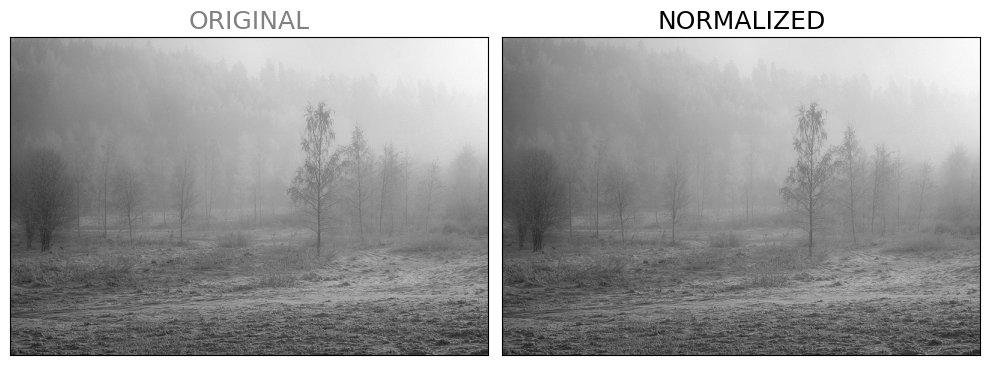

In [12]:
# normalize float versions
norm_img = cv2.normalize(src, None, alpha=0,
              beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# scale to uint8
norm_img = (255*norm_img).astype(np.uint8)


fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(src,'gray')
ax[0].set_title('ORIGINAL', fontsize=18, color='gray')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(norm_img,'gray')
ax[1].set_title('NORMALIZED', fontsize=18)
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout();   # final semi-column can substitute plt.show()

# Gamma correction using a LUT
Gamma correction can be used to correct the brightness of an image by using a non linear transformation between the input pixel values and the output pixel values. Here we use a look-up table to improve the performance of the computation as only 256 values needs to be calculated once.

In [17]:
import numpy as np

gamma=3.5
c=2.0
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(c*pow(i / 255.0, gamma) * 255.0, 0, 255)
print(lookUpTable)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   1   1   1   1   1   1   1   1   1   2
    2   2   2   2   2   3   3   3   3   3   4   4   4   4   4   5   5   5
    6   6   6   7   7   7   8   8   8   9   9  10  10  10  11  11  12  12
   13  13  14  14  15  16  16  17  17  18  19  19  20  21  22  22  23  24
   25  26  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  42
   43  44  45  46  48  49  50  52  53  55  56  57  59  60  62  64  65  67
   69  70  72  74  75  77  79  81  83  85  87  89  91  93  95  97  99 101
  104 106 108 111 113 115 118 120 123 125 128 131 133 136 139 142 144 147
  150 153 156 159 162 165 169 172 175 178 182 185 188 192 195 199 203 206
  210 214 217 221 225 229 233 237 241 245 249 254 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 

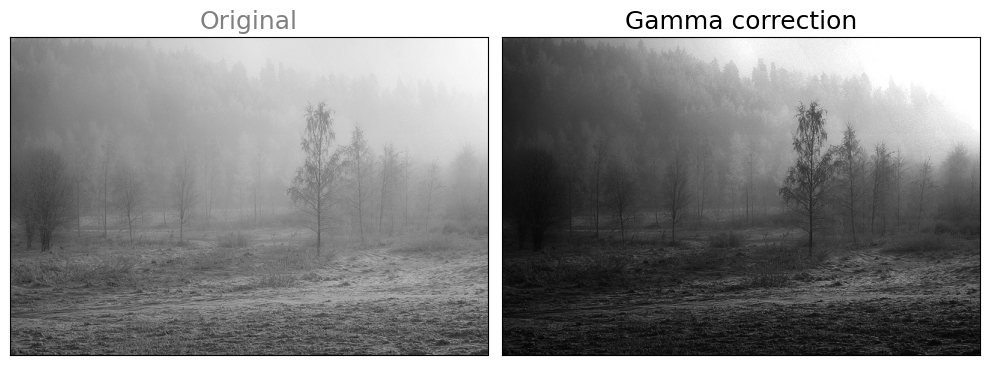

In [18]:
#let's apply the LUT to the image
res = cv2.LUT(src, lookUpTable)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(src,'gray')
ax[0].set_title('Original', fontsize=18, color='gray')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(res,'gray')
ax[1].set_title('Gamma correction', fontsize=18)
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout();   # final semi-column can substitute plt.show()

# Image Arithmetic
Other types of point operators are the pixel wise addition or subtraction of two images.

In [16]:
img1 = cv2.imread("dots.jpeg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("einstein.jpeg", cv2.IMREAD_GRAYSCALE)

resized1 = cv2.resize(img1, (200, 200))
resized2 = cv2.resize(img2, (200, 200))


fig, ax = plt.subplots(1,4, figsize=(8,8))
ax[0].imshow(resized1,'gray')
ax[0].set_title('IMG1', fontsize=18)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(resized2,'gray')
ax[1].set_title('IMG2', fontsize=18)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].imshow(resized1+resized2,'gray')
ax[2].set_title('IMG1+IMG2', fontsize=18)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[3].imshow(resized1-resized2,'gray')
ax[3].set_title('IMG1-IMG2', fontsize=18)
ax[3].set_xticks([])
ax[3].set_yticks([])
plt.tight_layout()
plt.show()

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


#Homework
Try other types of gray-level transformations, e.g. logaritmic or sigmoid transformation.

### Logaritmic Contrast Stretching
This stretching method can take advantage from the use of Lookup-Tables (LUT).
The formula of the logaritmic stretching is:

$$ T(l) = c \cdot \log(1+l) $$

where $c$ is a constant for scaling the logarithm, as a rule of thumb for 8 bit integer grayscale is:

$$ c = 255\cdot \log(1+255) $$

for floating point grayscale (each pixel value ranges in $[0,1]$) is:

$$ c = 1\cdot \log(1+1) $$

### Sigmoid Transformation (S-transform)
Transform according to the sigmoid function
$$ T(l) = \dfrac{1}{1+e^{-\gamma(t-c)}} $$